In [ ]:
pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/41.3 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 0.5/41.3 MB 8.4 MB/s eta 0:00:05
   - -------------------------------------- 1.1/41.3 MB 10.1 MB/s eta 0:00:04
   - -------------------------------------- 1.3/41.3 MB 9.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/41.3 MB 10.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/41.3 MB 12.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/41.3 MB 10.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/41.3 MB 11.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.8/41.3 MB 12.9 MB/s eta 0:00:03

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import linalg

### problema 1

In [2]:
def intenumcomp2(fun, a: float, b: float, N: int, regla: str):
    h = (b - a)/N
    vect_x = np.linspace(a, b, N+1)
    
    if regla == "trapecio":
        suma = fun(a) + fun(b)
        for k in range(1, N):
            suma += 2 * fun(vect_x[k])
        return (h/2) * suma
    
    elif regla == "simpson":
        if N % 2 != 0:
            raise ValueError("Para Simpson, N debe ser par")
        suma = fun(a) + fun(b)
        for k in range(1, N):
            if k % 2 == 0:
                suma += 2 * fun(vect_x[k])
            else:
                suma += 4 * fun(vect_x[k])
        return (h/3) * suma
    
    elif regla == "pm":
        suma = 0
        for k in range(N):
            punto_medio = (vect_x[k] + vect_x[k+1]) / 2
            suma += fun(punto_medio)
        return h * suma
    
    else:
        raise ValueError(f"{regla} no es un método válido (usar 'trapecio', 'simpson' o 'pm')")

In [3]:
#implemento una funcion para conseguir minimizar el error hasta la cota dada

def interr(fun,a,b,tol,real):
    N = 2
    while abs(intenumcomp2(fun,a,b,N,'simpson')-real) >= tol:
        N += 2

        if N ==1000:
            print('no se llego al minimo de la tolerancia')
            break

    return N, intenumcomp2(fun,a,b,N,'simpson')

In [4]:
#defino las funciones a integrar para el ajuste cuadratico por cuadrados minimos
def func0(x:float):
    return np.sin(x)
def func1(x:float):
    return x*np.sin(x)
def func2(x:float):
    return np.sin(x)*(x**2)
def pol0(x:float):
    return 1
def pol1(x:float):
    return x
def pol2(x:float):
    return x**2
def pol3(x:float):
    return x**3
def pol4(x:float):
    return x**4

In [5]:
#defino los valores de las integrales
int0 = interr(func0,0,np.pi/2,10e-5,1)[1]
int1 = interr(func1,0,np.pi/2,10e-5,1)[1]
int2 = interr(func2,0,np.pi/2,10e-5,np.pi-2)[1]
print(int0)
print(int1)
print(int2)



1.0000263121705926
0.9999206314107351
1.141540126566755


In [6]:
# ahora tambien tengo que realizar las integrales de los polinomios
#las integrales deberian ser exactas para todos los polinomios 
#salvo para el polinomio  de grado 4
intpol0 = intenumcomp2(pol0,0,np.pi/2,2,'simpson')
intpol1 = intenumcomp2(pol1,0,np.pi/2,2,'simpson')
intpol2 = intenumcomp2(pol2,0,np.pi/2,2,'simpson')
intpol3 = intenumcomp2(pol3,0,np.pi/2,2,'simpson')
intpol4 = interr(pol4,0,np.pi/2,10e-5,np.pi**5/(5*2**5))[1]

print(intpol4)


1.9126845211319636


### problema 2

In [7]:
#armo la matriz A del sistema a resolver
A = np.zeros([3,3])
A[0,0] = intpol0
A[0,1] = intpol1
A[0,2] = intpol2
A[1,0] = intpol1
A[1,1] = intpol2
A[1,2] = intpol3
A[2,0] = intpol2
A[2,1] = intpol3
A[2,2] = intpol4
print(A)

[[1.57079633 1.23370055 1.2919282 ]
 [1.23370055 1.2919282  1.52201705]
 [1.2919282  1.52201705 1.91268452]]


In [8]:
#armo la matriz B del sistema a resolver
B = np.array([int0,int1,int2])
print(B)

[1.00002631 0.99992063 1.14154013]


In [9]:
#uso linalg para realizar la descompcision y resolver las ecuaciones del sistema
#para ello defino la funcion sollu
def sollu(A,B):
    P,L,U = linalg.lu(A)
    pb = P @ B
    y_sol = linalg.solve_triangular(L,pb,lower=True)
    coeficientes = linalg.solve_triangular(U,y_sol)
    return coeficientes

In [10]:
coeficientes = sollu(A,B)

In [ ]:
#defino el polinomio cuadratico con los coeficientes
def aprox_cuadmin(x):

    cuadmin = coeficientes[0] + coeficientes[1]*x + coeficientes[2]*x**2

    return cuadmin

### problema 3

In [ ]:
#defino los 5 puntos equiespaciados y les atribuyo un valor en la funcion
nodos = np.linspace(0,np.pi/2,5)
print(nodos)
y = func0(nodos)
print(y)

[0.         0.39269908 0.78539816 1.17809725 1.57079633]
0.39269908169872414
[0.         0.38268343 0.70710678 0.92387953 1.        ]


In [ ]:
#defino el spline cubico
spline_3 = interp1d(nodos,y,'cubic')
x = np.linspace(0,np.pi/2,50)
pol = spline_3(x)
print(pol)

[0.         0.03214123 0.06422156 0.09621189 0.12808313 0.15980618
 0.19135194 0.22269132 0.25379522 0.28463454 0.31518018 0.34540306
 0.37527407 0.40476411 0.4338441  0.46248492 0.49065749 0.51833271
 0.54548148 0.5720747  0.59808328 0.62347812 0.64823012 0.6723102
 0.69568924 0.71833843 0.74023537 0.76136404 0.78170873 0.80125372
 0.81998327 0.83788166 0.85493318 0.87112209 0.88643267 0.9008492
 0.91435596 0.92693722 0.93857726 0.94926035 0.95897077 0.9676928
 0.97541071 0.98210878 0.98777128 0.9923825  0.9959267  0.99838817
 0.99975118 1.        ]


### problema 4

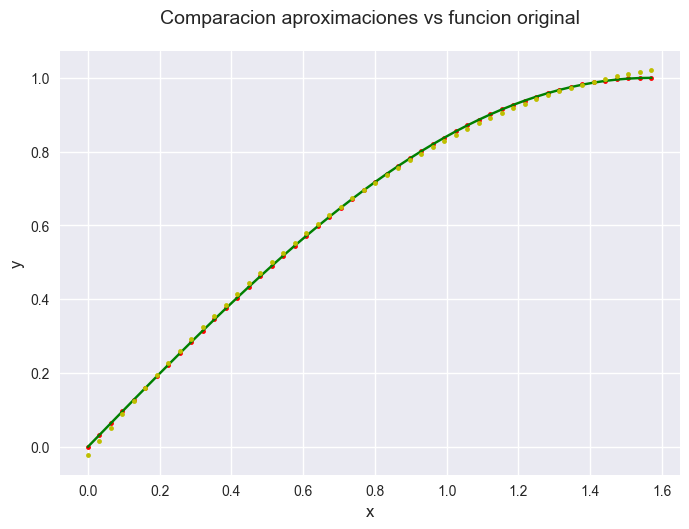

In [20]:
#grafico las aproximaciones
plt.style.use('seaborn-v0_8')
plt.title('Comparacion aproximaciones vs funcion original', fontsize=14, pad=20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.plot(x,pol,'.r')
plt.plot(x,func0(x),'-g')
plt.plot(x,aprox_cuadmin(x),'.y')